In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('../00_data/income_pred.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [10]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


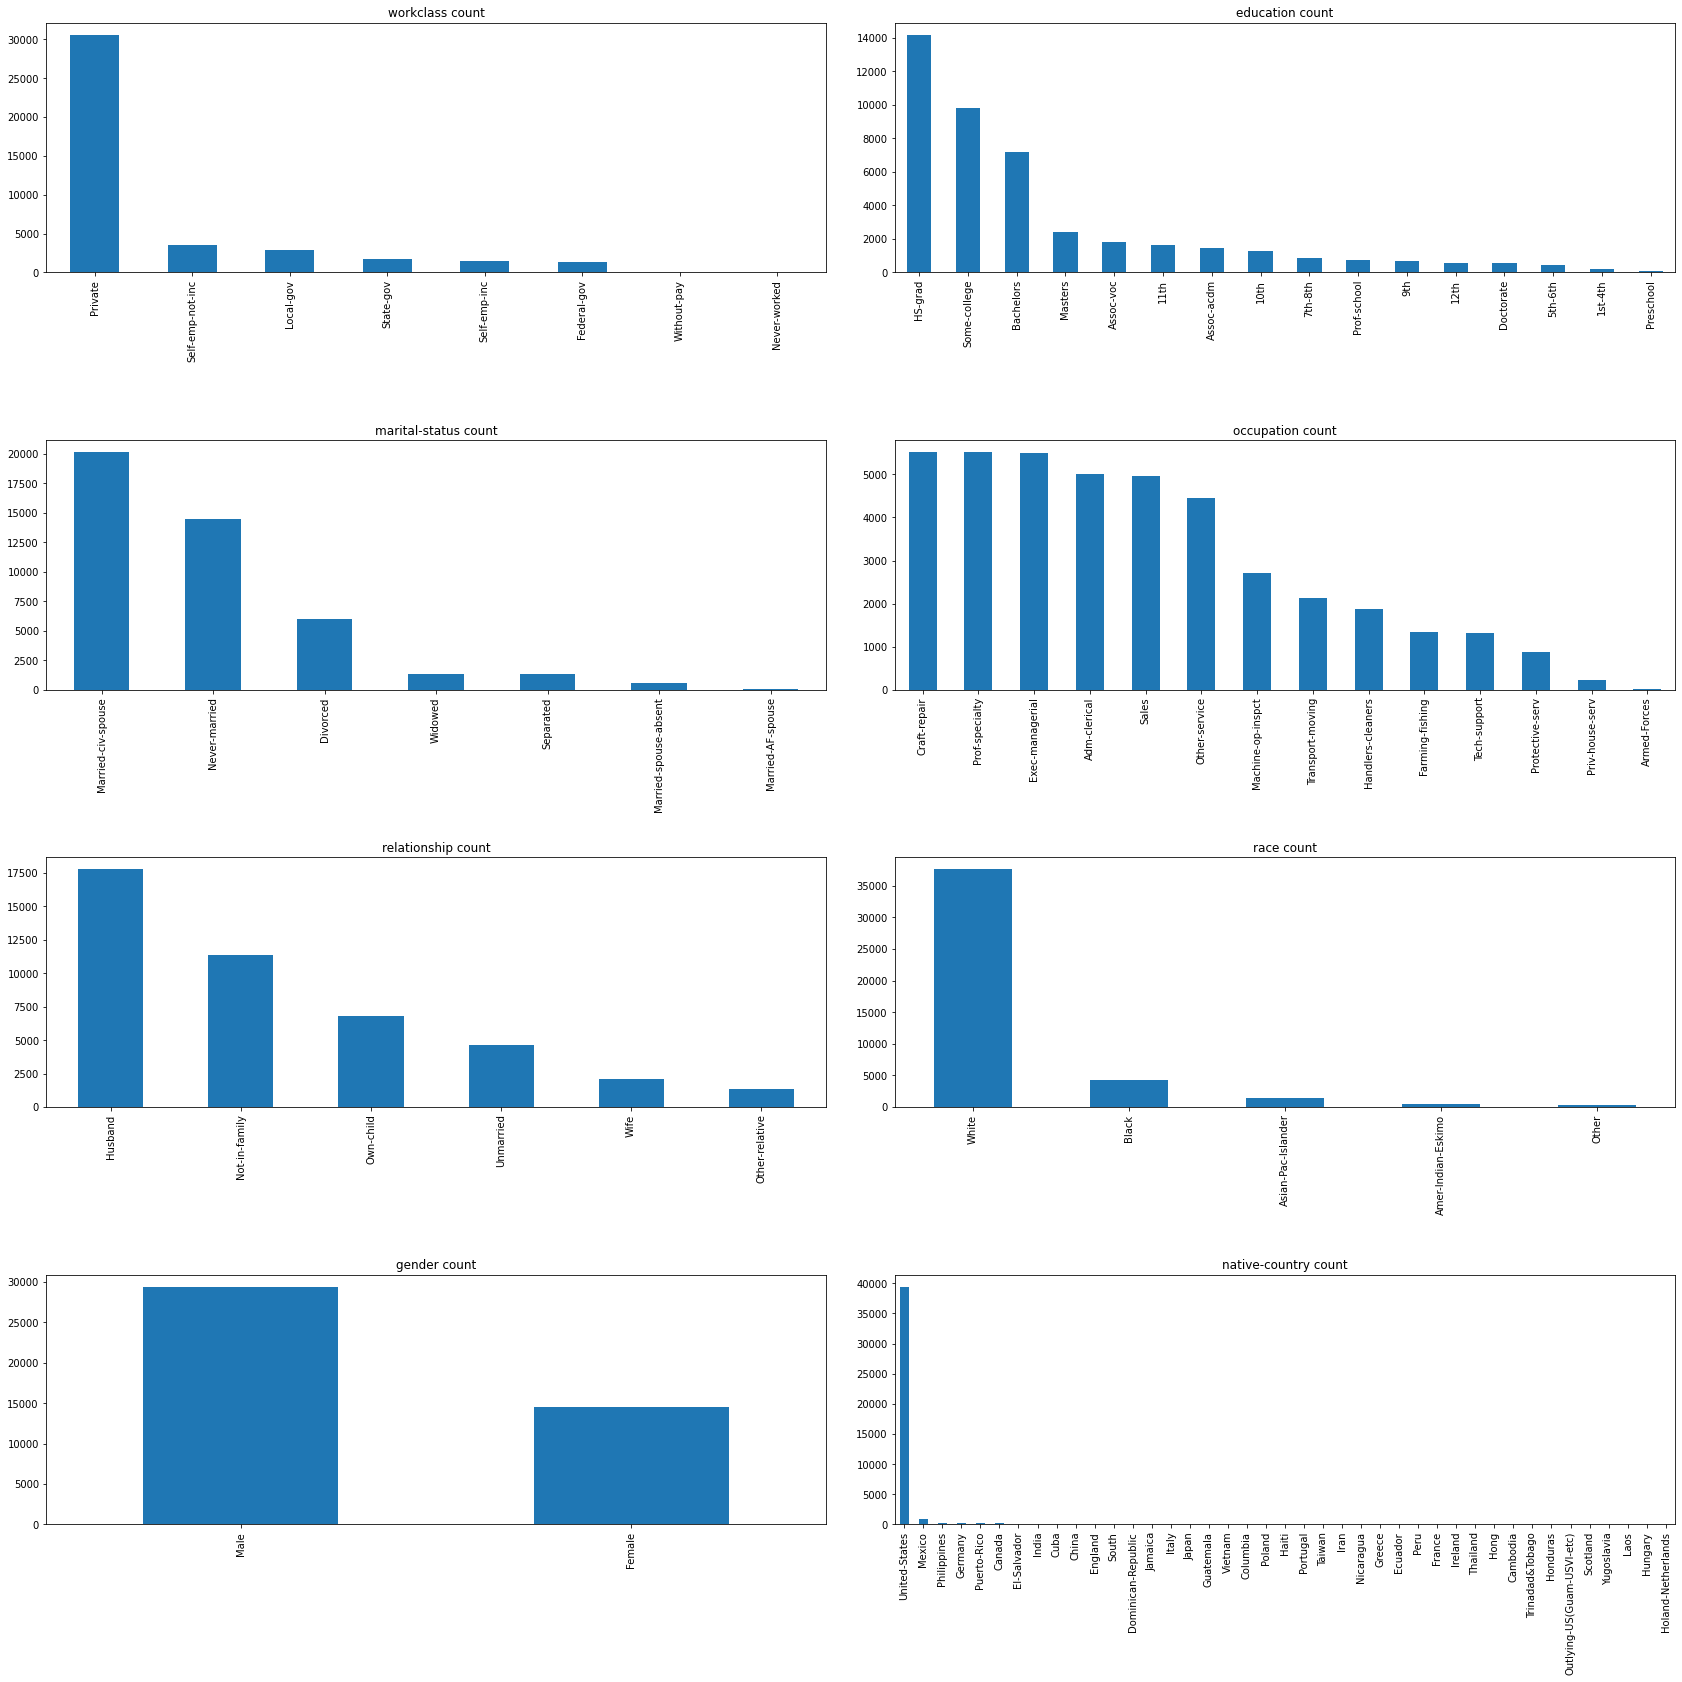

In [52]:
def value_count_plot(types):
  fig = plt.figure(figsize=(24,24))
  for i in range(len(types)):
    ax = fig.add_subplot(4,2, i+1)
    ax = df[types[i]].value_counts().plot(kind='bar')
    ax.set_title(str(types[i]) + " count")
    fig.tight_layout(pad=3.0)
  fig.show()    

types = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
value_count_plot(types)

In [62]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [76]:
df[df.occupation.isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [77]:
df[df.workclass.isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [80]:
df[df['native-country'].isna()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
72,53,Local-gov,228723,HS-grad,9,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,40,NaN,1
119,29,Private,113870,1st-4th,2,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,NaN,0
203,66,Private,73522,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,NaN,0
213,36,Self-emp-not-inc,160120,Bachelors,13,Married-civ-spouse,Sales,Husband,Other,Male,0,0,45,NaN,0
371,55,Private,380357,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43851,45,Self-emp-not-inc,163559,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,NaN,0
43852,23,Private,216672,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,30,NaN,0
43872,29,Private,144259,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,4386,0,80,NaN,1
43880,54,Self-emp-inc,304570,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,7688,0,40,NaN,1
